# This file contains all the models defined for this coursework


- Part 1 contains all the models with the best parameters coded in 
- Part 2 contains the code used for parameter tuning 

In [1]:
# import libraries 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from termcolor import colored

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, mean_squared_error,precision_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from sklearn import metrics

import pandas as pd
import numpy as np
import itertools



In [ ]:
# function for confusion matrix - used for CNN and CD-SMOTE Repo

    
def plot_confusion_matrix_custom(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=45)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(None) 
    plt.show()
    
    
    
    # code for this function is adapted from deeplizard.com

## Part 1

In [2]:
# 1.1 ADA boost Model 

def ADAboost_mod(repo,target,split_list):
    
    X_train, X_test, y_train, y_test = train_test_split(repo,target,stratify=target,                                                
                                                    test_size=.2,shuffle = True,
                                                    random_state=100)

    print(colored("\n The ADA boost Model is been initiated... \n",'blue'))

    # Create adaboost classifer object
    abc = AdaBoostClassifier(n_estimators=300,learning_rate=1)
    # Train Adaboost Classifer
    model = abc.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = model.predict(X_test)
    y_predtrain  = model.predict(X_train) # added
    
    print(colored("\n The ADA boost Model fitted and prediction is completed \n",'green'))    
    split = [X_train,X_test, y_train, y_test,y_pred,y_predtrain]
    
    split_list.append(split)
    return model;    
    

    

In [3]:
# 1.2  SVC  Model 

def SVClinear(repo,target,split_list):
    
    X_train, X_test, y_train, y_test = train_test_split(repo,target,stratify=target,                                                
                                                    test_size=.2,shuffle = True,
                                                    random_state=100)
    # define support vector classifier
    print(colored("\n The SVC Linear Model is been initiated... \n",'blue'))

    model = SVC(kernel='linear',gamma=0.01,C = 0.001,probability=True, random_state=42)

    # fit model
    model.fit( X_train, y_train)

    # generate predictions
    y_pred = model.predict(X_test)
    y_predtrain  = model.predict(X_train) # added
    
    print(colored("\n The SVC Linear Model fitted and prediction is completed \n",'green'))
    #cm, split =  calculate_metrics(model,X_train,X_test, y_train, y_test, y_pred, target)

    split = [X_train,X_test, y_train, y_test,y_pred,y_predtrain]
    #df = pd.DataFrame(cm)
    #results_dict.append(cm)
    split_list.append(split)
    return model;



    

In [4]:
# 1.3 random forest model 

def RF(repo,target,split_list):
    
    X_train, X_test, y_train, y_test = train_test_split(repo,target,stratify=target,                                                
                                                    test_size=.2,shuffle = True,
                                                    random_state=100)
    # define support vector classifier
    print(colored("\n The Random Forest Model is been initiated... \n",'blue'))
    
    # set model with best parameters obtained after tuning
    
   

    model = RandomForestClassifier(n_estimators = 150, random_state = 100,min_samples_split = 8 ,
                                   max_features = "auto",max_depth = 11)
    
    # fit model
    model.fit( X_train, y_train)

    # generate predictions
    y_pred = model.predict(X_test)
    y_predtrain  = model.predict(X_train) # added
    
    print(colored("\n The Random Forest Model fitted and prediction is completed \n",'green'))
    
    
    split = [X_train,X_test, y_train, y_test,y_pred,y_predtrain]     # added predtrain
   
    split_list.append(split)      
    return model;
    

In [5]:
# 1.4 CNN model 

def CNN_mod(repo_name,repo,target,labels,saved_model_name,split_list):

    # encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(target)
    encoded_target = encoder.transform(target)
    classes = ['CorrectlyMasked','IncorrectlyMasked','UnMasked']
    
    # Preprocess input data
    
    # extra processing steps needed here for CNN

    repo_np = np.array(repo)
    
    resize_width  = 200 # same as mine file 
    resize_height = 200 # same as mine file 
   
    repo_np = np.array(repo_np).reshape(-1,resize_width,resize_height)
    repo_np.shape

    target_np = np.array(target)
    target_np.shape


    
    # train test split for the pre-processed repo

    X_train, X_test, y_train, y_test = train_test_split(repo_np,target_np,stratify=target_np,                                                
                                                        test_size=.2,shuffle=True,
                                                        random_state=100)

    # Reshape into four dimensions.

    X_train_reshaped = X_train.reshape(X_train.shape[0], 200, 200,1)
    X_test_reshaped =  X_test.reshape(X_test.shape[0], 200, 200,1)
    # Convert to float 32
    X_train_reshaped = X_train_reshaped.astype('float32')
    X_test_reshaped = X_test_reshaped.astype('float32')

    # normalise
    X_train_reshaped /= 255 
    X_test_reshaped /= 255
    
    # encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(y_train)
    encoded_y_train = encoder.transform(y_train)

    print("Shape of train before one-hot encoding: ", y_train.shape)
    # convert integers to dummy variables (i.e. one hot encoded)
    y_train_bin = np_utils.to_categorical(encoded_y_train)
    print("Shape of train after one-hot encoding: ", y_train_bin.shape)

    encoder.fit(y_test)
    encoded_y_test = encoder.transform(y_test)
    y_test_bin = np_utils.to_categorical(encoded_y_test)
 
    print(colored("\n Sample encoded value: \n",'green'))
   
    
    # Define model architecture and print summary 
    
    print(colored("\nThe CNN Model is been initialised.. \n",'blue'))
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200,200,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(labels, activation='softmax'))

    #summarize the model
    print(colored("\nThe CNN Model Summary \n",'green'))
    model.summary()

    # Compile model
    print(colored("\nThe CNN Model is compiling .... \n",'blue'))
    model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
    
    
#     # ************* CODE FOR EARLY STOPPING , commented out to use saved best model  **************
    
#     # simple early stopping
#     #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#     es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1)

#     mc = ModelCheckpoint(saved_model_name, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#     # fit model
#     np.random.seed(100)

    n=100            # smaller training set split for fitting

#     history = model.fit(X_train_reshaped[:n], y_train_bin [:n], validation_data=(X_test_reshaped[:n], y_test_bin[:n]), 
#                         epochs=100, verbose=0, callbacks=[es, mc])

#     # # plot training history
#     plt.plot(history.history['accuracy'], label='train')
#     plt.plot(history.history['val_accuracy'], label='test')
#     # Add title and axis names
#     plt.title('Model Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show() 

    # load the saved model
    saved_model = load_model(saved_model_name)
    
  
    # evaluate the model
    _, train_acc = saved_model.evaluate(X_train_reshaped[:n], y_train_bin [:n], verbose=0)
    _, test_acc  = saved_model.evaluate(X_test_reshaped[:n], y_test_bin[:n], verbose=0)
    print('\n\nTrain Accuracy : %.3f, Test Accuracy : %.3f' % (train_acc, test_acc))
    
    y_pred = saved_model.predict(X_test_reshaped)
    y_pred_labels = np.argmax(y_pred , axis=-1)
    y_pred_label_names = encoder.inverse_transform(y_pred_labels)
    y_test_c = []
    y_pred_c = []  
    if(labels == 9) : # Join all sub classes together for CDSMOTE
        for i,label in enumerate(y_test[:n]):
            y_test_c.append(label.split('_')[0])
            y_pred_c.append(y_pred_label_names[i].split('_')[0])
    else:
        y_test_c = y_test[:n]
        y_pred_c = y_pred_label_names[:n]        
    split = [y_test_c,y_pred_c]
    split_list.append(split) #return test and pred back for plotting together
    
         

## Part 2

**Parameter list for tuning:**

- RF: min_samples_split,max_features, max_depth 
- Adaboost: learning_rate,n_estimators
- SVC: kernel ,C,gamma


                    ******   PARAMETER TUNING SECTION    ******  NOT USED IN THE FINAL RUN TO SAVE TIME  *******

In [6]:
#2.1 SVC_parametertuning


def SVC_parametertuning(repo,target,split_list):
    
    X_train, X_test, y_train, y_test = train_test_split(repo,target,stratify=target,                                                
                                                    test_size=.2,shuffle = True,
                                                    random_state=100)
    
    # Finish the dictionary by adding the max_depth parameter
    param_dist = {  "kernel" : ['linear','poly','rbf'],
                   "C": [0.001,0.01,0.1,1,10],
                   "gamma":[0.01,0.1,1]}
    
    svc = SVC(probability=True, random_state=100)
    
    # Create a scorer to use (use the mean squared error)
    scorer = make_scorer(precision_score)
    
    print('Searching  SVC  for best parameters ......')
    # Build a random search using param_dist, rfr, and scorer
    svcsearch =\
    RandomizedSearchCV(
        estimator=svc,
        param_distributions=param_dist,
        n_iter=2,
        cv=5,
        scoring=None)
    svcsearch.fit(X_train, y_train)
    
    
    # print the best model score:
    
    print('The best accuracy for a single model was: {}'.format(svcsearch.best_score_))
    
    # print the best parameters :
    print('The best parameter in the grid was : {}.'.format(svcsearch.best_params_))
    

The Result: 


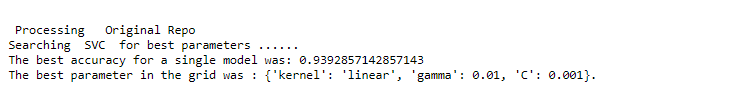

In [7]:
# 2.2 model Parameter tuning in  in RF


def RF_parametertuning(repo,target,split_list):
    
    
        
    X_train, X_test, y_train, y_test = train_test_split(repo,target,stratify=target,                                                
                                                    test_size=.2,shuffle = True,
                                                    random_state=100)
    
    # Finish the dictionary by adding the max_depth parameter
    param_dist = {             
                  "min_samples_split": [7,8,9,10,11],
                  "max_features": [30,35,40,41,42,50],
                  "max_depth": [8,9,10,11,12]}
    
    rfr = RandomForestClassifier(n_estimators=150, random_state=100)
    
    # Create a scorer to use (use the mean squared error)
    scorer = make_scorer(precision_score)
    
    print('Starting Random Search for best parameters ......')
    # Build a random search using param_dist, rfr, and scorer
    rfsearch =\
    RandomizedSearchCV(
        estimator=rfr,
        param_distributions=param_dist,
        n_iter=10,
        cv=5,
        scoring=None)
    rfsearch.fit(X_train, y_train)
    
    
     # print the best model score:
    print('The best accuracy for a single model was: {}'.format(rfsearch.best_score_))
    # print the best parameters :
    print('The best parameter in the grid was : {}.'.format(rfsearch.best_params_))
    
 

The result:

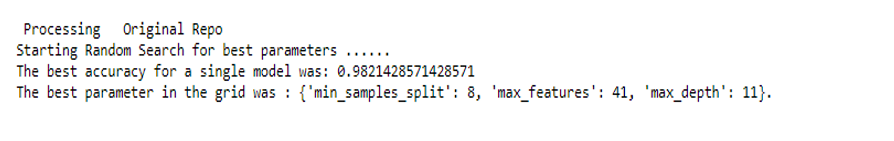

In [8]:
#2.3 ADAboost parametertuning

from sklearn.ensemble import AdaBoostClassifier

def ADAboost_parametertuning(repo,target,split_list):
    
    X_train, X_test, y_train, y_test = train_test_split(repo,target,stratify=target,                                                
                                                    test_size=.2,shuffle = True,
                                                    random_state=100)
    
    # Finish the dictionary by adding the max_depth parameter
    param_dist = {             
                  'learning_rate':[0.8,0.9,1],
                   'n_estimators':[300,400]}
    
    abc = AdaBoostClassifier(random_state=100)
    
    # Create a scorer to use (use the mean squared error)
    scorer = make_scorer(precision_score)
    
    print('Searching  Adaboost  for best parameters ......')
    # Build a random search using param_dist, rfr, and scorer
    abcsearch =\
    RandomizedSearchCV(
        estimator=abc,
        param_distributions=param_dist,
        n_iter=2,
        cv=5,
        scoring=None)
    abcsearch.fit(X_train, y_train)
    
    
     # print the best model score:
    print('The best accuracy for a single model was: {}'.format(abcsearch.best_score_))
    # print the best parameters :
    print('The best parameter in the grid was : {}.'.format(abcsearch.best_params_))   



The result: 

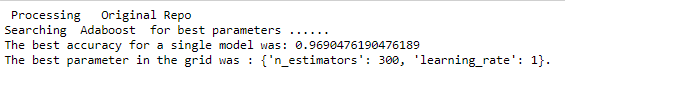

Ideally, all the model's hyperparameters should be tuned for each repo separately to limitations on computational power and time, the models have only been tuned for the original repo which  will be tested on all repos.